# Testing new scripts

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

## Filtering dataset

In [2]:
path = '../datasets/preprocessed/'
rat = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')
rat.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id
index,,,,,,,,,
0,0,0.000000,-0.057399,0.070985,-0.050572,-0.636110,-0.763631,-0.110595,0
1,1,0.004167,-0.057420,0.070951,-0.050517,-0.635684,-0.763778,-0.112020,0
2,2,0.008333,-0.057503,0.070895,-0.050505,-0.636720,-0.762427,-0.115295,0
3,3,0.012500,-0.057525,0.070861,-0.050480,-0.636537,-0.762167,-0.117995,0
4,4,0.016667,-0.057545,0.070851,-0.050470,-0.635629,-0.762408,-0.121281,0


In [3]:
colChoice = ['X_Pos', 'Y_Pos', 'Z_Pos', 'X_Ori', 'Y_Ori', 'Z_Ori']
FILT_REARING_YPOS = 0.13
FILT_CLEANING_YPOS = 0.07
FILT_CLEANING_YORI = -0.75

## Filtering the dataset

In [4]:
rat['Filtered_rear'] = rat['Y_Pos'] < FILT_REARING_YPOS
rat.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered_rear
index,,,,,,,,,,
0,0,0.000000,-0.057399,0.070985,-0.050572,-0.636110,-0.763631,-0.110595,0,True
1,1,0.004167,-0.057420,0.070951,-0.050517,-0.635684,-0.763778,-0.112020,0,True
2,2,0.008333,-0.057503,0.070895,-0.050505,-0.636720,-0.762427,-0.115295,0,True
3,3,0.012500,-0.057525,0.070861,-0.050480,-0.636537,-0.762167,-0.117995,0,True
4,4,0.016667,-0.057545,0.070851,-0.050470,-0.635629,-0.762408,-0.121281,0,True


In [5]:
rat['Filtered_clean'] = (rat['Y_Ori'] > FILT_CLEANING_YORI) & (rat['Y_Pos'] > FILT_CLEANING_YPOS)
rat.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered_rear,Filtered_clean
index,,,,,,,,,,,
0,0,0.000000,-0.057399,0.070985,-0.050572,-0.636110,-0.763631,-0.110595,0,True,False
1,1,0.004167,-0.057420,0.070951,-0.050517,-0.635684,-0.763778,-0.112020,0,True,False
2,2,0.008333,-0.057503,0.070895,-0.050505,-0.636720,-0.762427,-0.115295,0,True,False
3,3,0.012500,-0.057525,0.070861,-0.050480,-0.636537,-0.762167,-0.117995,0,True,False
4,4,0.016667,-0.057545,0.070851,-0.050470,-0.635629,-0.762408,-0.121281,0,True,False


In [6]:
rat['Filtered'] = rat['Filtered_rear'] | rat['Filtered_clean']
rat.drop(['Filtered_rear', 'Filtered_clean'], axis=1, inplace=True)
rat.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered
index,,,,,,,,,,
0,0,0.000000,-0.057399,0.070985,-0.050572,-0.636110,-0.763631,-0.110595,0,True
1,1,0.004167,-0.057420,0.070951,-0.050517,-0.635684,-0.763778,-0.112020,0,True
2,2,0.008333,-0.057503,0.070895,-0.050505,-0.636720,-0.762427,-0.115295,0,True
3,3,0.012500,-0.057525,0.070861,-0.050480,-0.636537,-0.762167,-0.117995,0,True
4,4,0.016667,-0.057545,0.070851,-0.050470,-0.635629,-0.762408,-0.121281,0,True


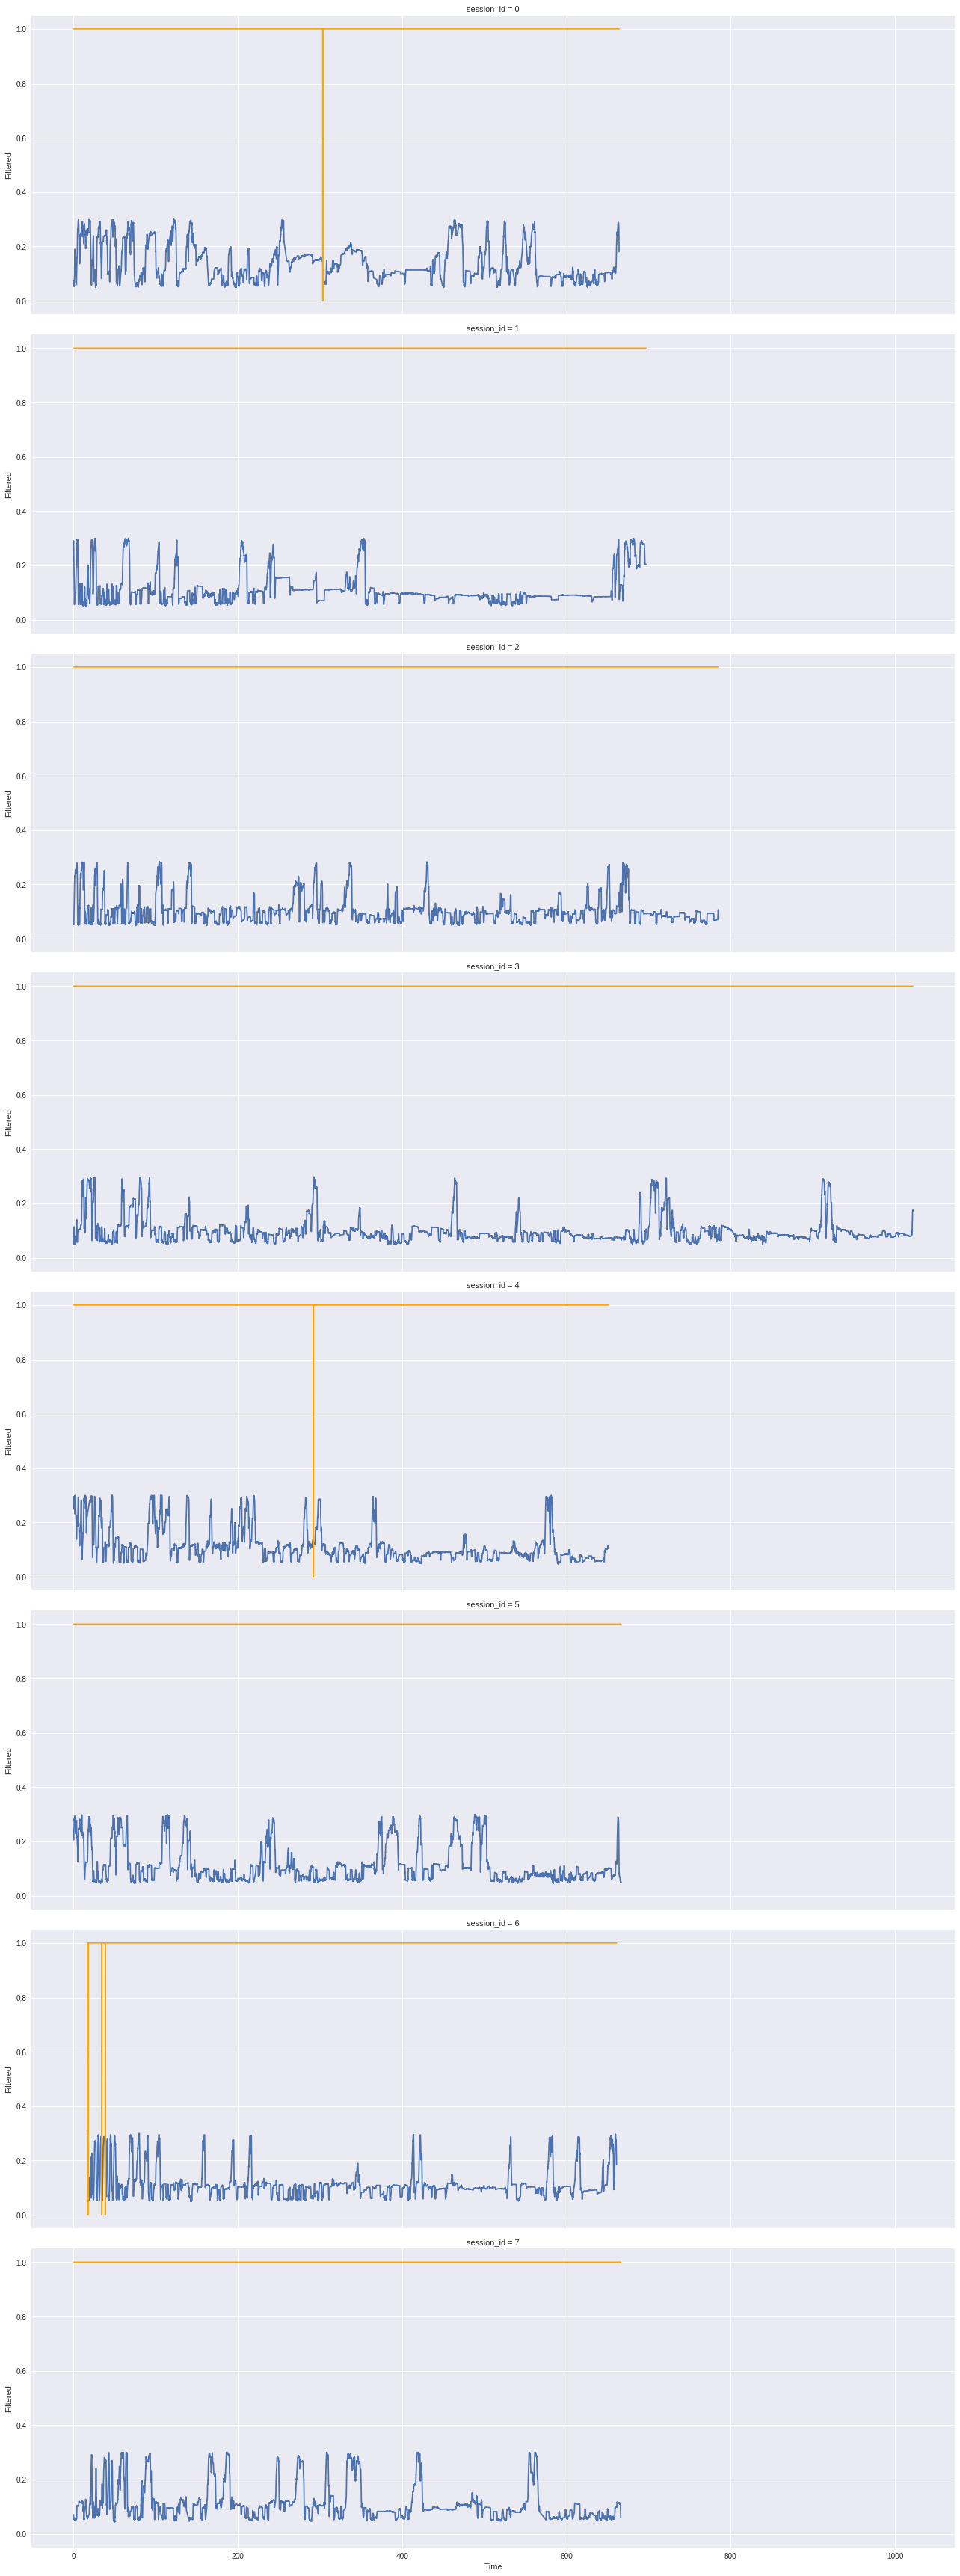

In [17]:
g = sns.FacetGrid(data=rat, size=6, aspect=3, row='session_id');
g.map(plt.plot, 'Time', 'Y_Pos')
g.map(plt.plot, 'Time', 'Filtered', color='orange')


## Loading from script

In [24]:
filt = pd.read_hdf(path+'filteredDatabase.h5', 'Rat_Behavior').set_index('index')
filt.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered
index,,,,,,,,,,
0,0,0.000000,-0.057399,0.070985,-0.050572,-0.636110,-0.763631,-0.110595,0,1
1,1,0.004167,-0.057420,0.070951,-0.050517,-0.635684,-0.763778,-0.112020,0,1
2,2,0.008333,-0.057503,0.070895,-0.050505,-0.636720,-0.762427,-0.115295,0,1
3,3,0.012500,-0.057525,0.070861,-0.050480,-0.636537,-0.762167,-0.117995,0,1
4,4,0.016667,-0.057545,0.070851,-0.050470,-0.635629,-0.762408,-0.121281,0,1


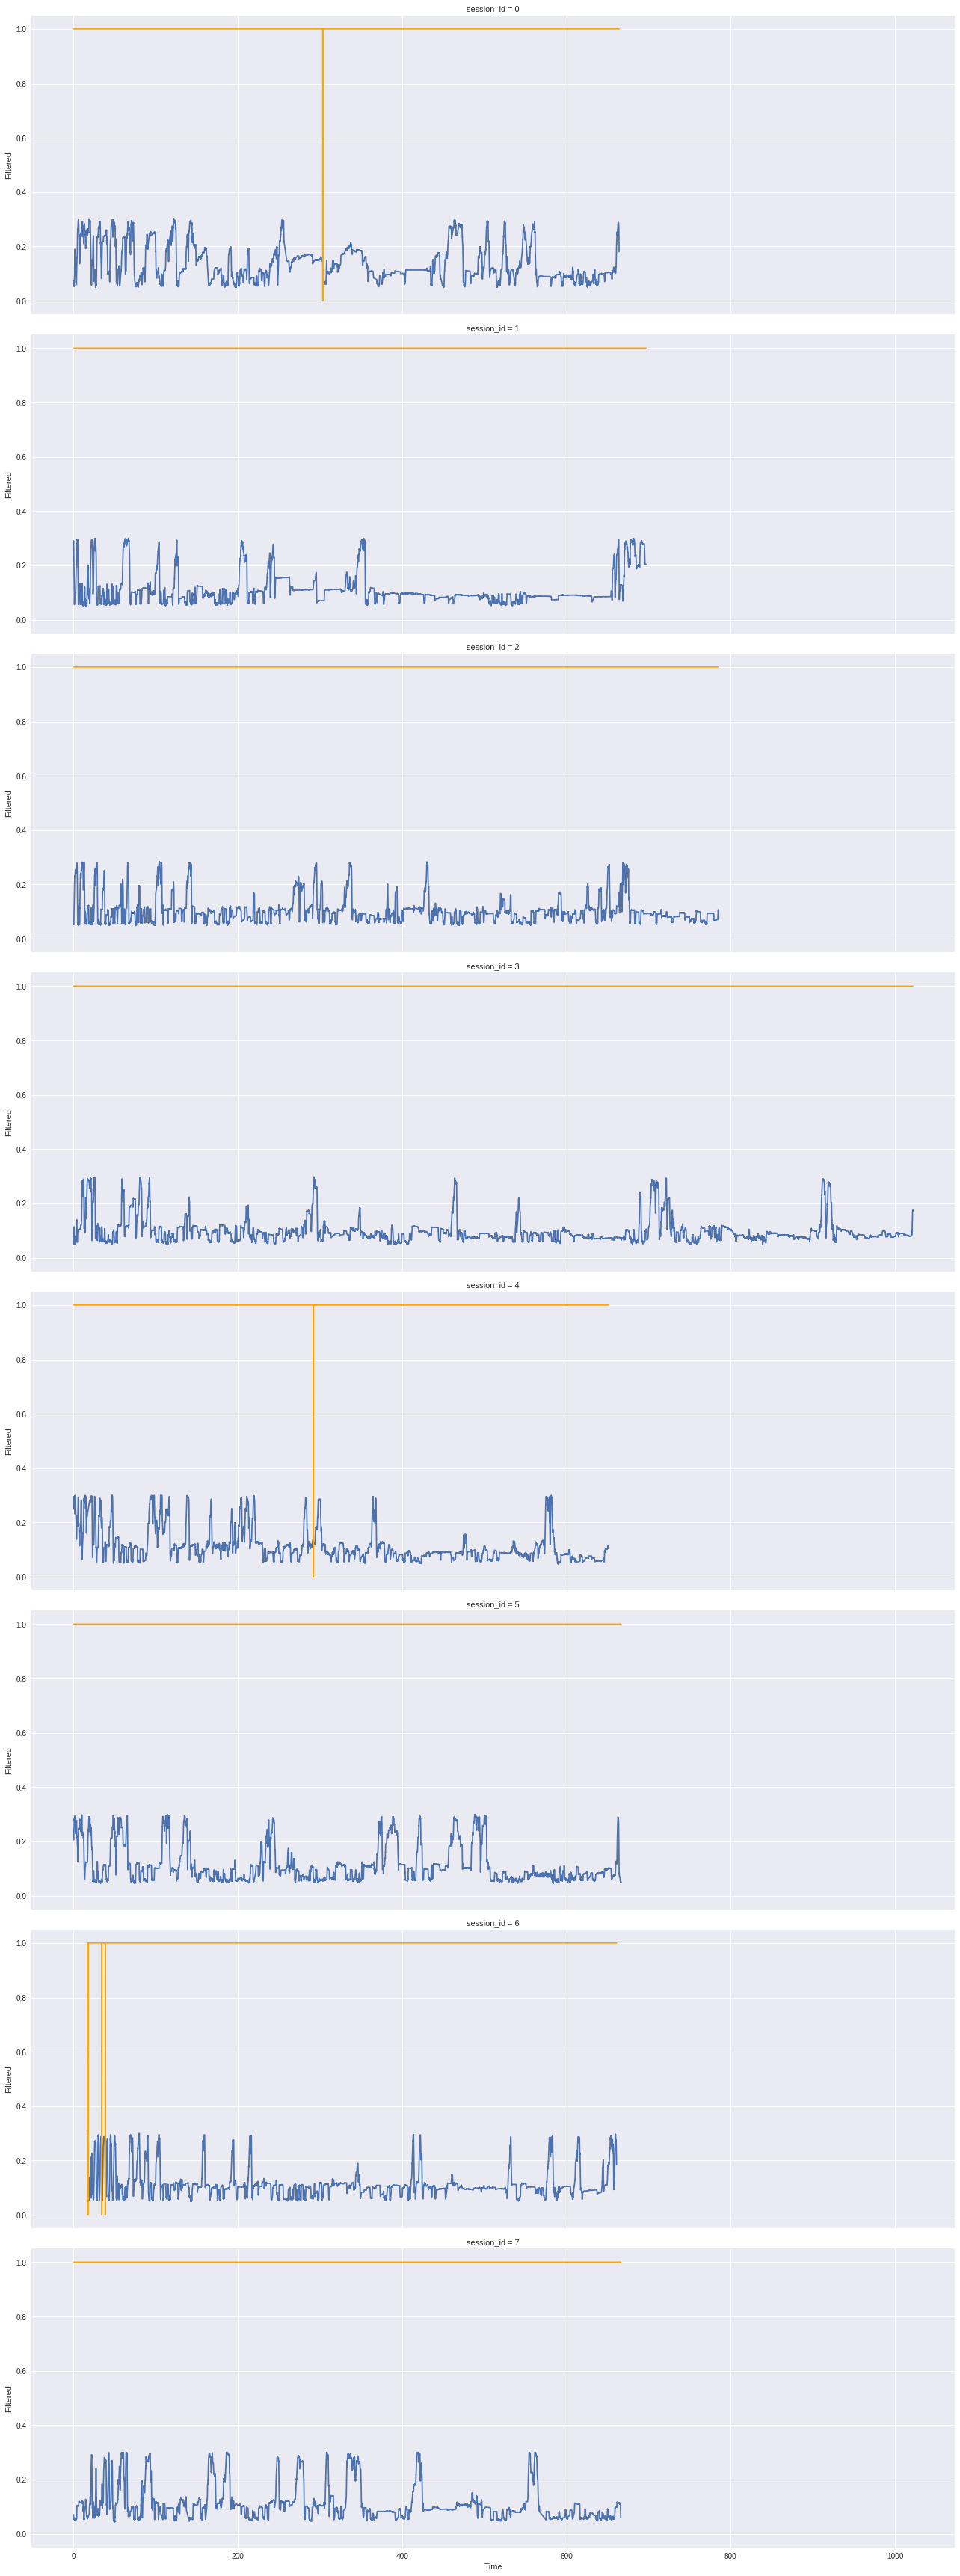

In [25]:
g = sns.FacetGrid(data=filt, size=6, aspect=3, row='session_id');
g.map(plt.plot, 'Time', 'Y_Pos')
g.map(plt.plot, 'Time', 'Filtered', color='orange')


## Velocity dataset

In [27]:
ratv = pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')
ratv.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var
index,,,,,,,,,,,,,
1,1,0.004167,-0.057420,0.070951,-0.050517,-0.635684,-0.763778,-0.112020,0,1,-99.993987,-31.445262,NaN
2,2,0.008333,-0.057503,0.070895,-0.050505,-0.636720,-0.762427,-0.115295,0,1,-100.263728,-64.748257,NaN
3,3,0.012500,-0.057525,0.070861,-0.050480,-0.636537,-0.762167,-0.117995,0,1,-100.501752,-57.121056,NaN
4,4,0.016667,-0.057545,0.070851,-0.050470,-0.635629,-0.762408,-0.121281,0,1,-100.802463,-72.165053,NaN
5,5,0.020833,-0.057460,0.070922,-0.050458,-0.632236,-0.764616,-0.125061,0,1,-101.189075,-92.801645,NaN
